# What is a Computer Vision Problem : 
* Binary / Multi Class Classification 
* Object Detection / Tesla Autopilot 

In [2]:
# Convolutional Neural Network 

In [3]:
"""
Computer vision is the practice of writing algorithms which can discover patterns in visual data, 
such as camera of a self driving car recognizing the vehicle in front 
"""

'\nComputer vision is the practice of writing algorithms which can discover patterns in visual data, \nsuch as camera of a self driving car recognizing the vehicle in front \n'

In [4]:
## Get the data for food vision 
# !pip install kagglehub

In [5]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("dansbecker/food-101")

# print("Path to dataset files:", path)

In [6]:
import pandas as pd 

labels = pd.read_csv('../data/food_classification/train_img.csv')

In [7]:
labels.head()

,ImageId,ClassName
0,f27632d7e5.jpg,water
1,efa87919ed.jpg,pizza-margherita-baked
2,4f169e8c8d.jpg,broccoli
3,a6956654bf.jpg,salad-leaf-salad-green
4,d99ce8c3bf.jpg,egg


In [8]:
labels.describe

<bound method NDFrame.describe of              ImageId                 ClassName
0     f27632d7e5.jpg                     water
1     efa87919ed.jpg    pizza-margherita-baked
2     4f169e8c8d.jpg                  broccoli
3     a6956654bf.jpg    salad-leaf-salad-green
4     d99ce8c3bf.jpg                       egg
...              ...                       ...
9318  ba8233c7d2.jpg  bread-french-white-flour
9319  2090043907.jpg                  wine-red
9320  8762d1cefd.jpg                    carrot
9321  28e7439245.jpg                  broccoli
9322  ba263cfb41.jpg                  cucumber

[9323 rows x 2 columns]>

In [9]:
# import zipfile 

# zip_ref = zipfile.ZipFile("../data/pizza_steak.zip") 
# zip_ref.extractall() 
# zip_ref.close()

In [10]:
## Inspect the data (become one with it) 
!ls ../data/pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [11]:
!pwd

/workspace/01_tensorflow_htv/03_tensorflow_neural_network_classification/nb


In [12]:
import os
pizza_train_files = os.listdir("../data/pizza_steak/train/pizza/")
path = "/workspace/01_tensorflow_htv/03_tensorflow_neural_network_classification/data" 
pizza_train_filepaths = [path + "/pizza_steak/train/pizza/" + file for file in pizza_train_files if not file.startswith(".")]

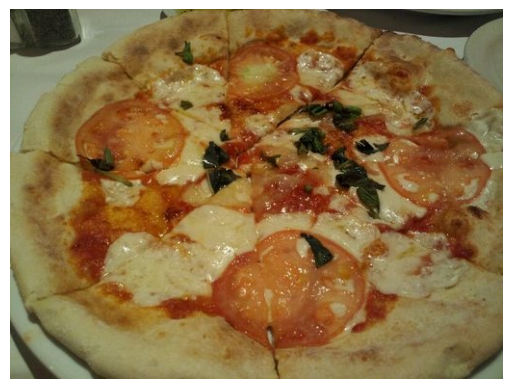

In [13]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

img = Image.open(pizza_train_filepaths[0])

plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
len(pizza_train_filepaths)

750

In [15]:
for dirpath, dirnames, filenames in os.walk("../data/pizza_steak"): 
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '../data/pizza_steak'
There are 2 directories and 0 images in '../data/pizza_steak/test'
There are 0 directories and 250 images in '../data/pizza_steak/test/pizza'
There are 0 directories and 250 images in '../data/pizza_steak/test/steak'
There are 2 directories and 0 images in '../data/pizza_steak/train'
There are 0 directories and 750 images in '../data/pizza_steak/train/pizza'
There are 0 directories and 750 images in '../data/pizza_steak/train/steak'


In [16]:
import pathlib 
import numpy as np 

# Get classnames programmatically
class_names = os.listdir("../data/pizza_steak/train/") 
class_names

# OR 

data_dir = pathlib.Path("../data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [17]:
# Visualize image 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random

def view_random_image(target_dir, target_class): 
    # setup target folder 
    target_folder = os.path.join(target_dir, target_class) 

    # Get a random image path  
    random_image = random.sample(os.listdir(target_folder), 1)

    print(random_image)

    # Read in the image  and plot it using matplotlib 

    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(f"{target_class} / Image shape : {img.shape}", fontsize=10) 
    plt.axis("off"); 
    return img

['2602611.jpg']


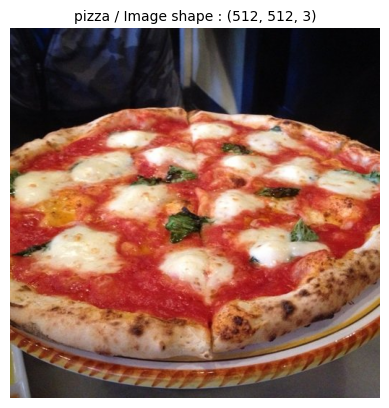

In [20]:
img = view_random_image("../data/pizza_steak/train", "pizza")
# img

In [21]:
import tensorflow as tf 

tf.constant(img) 

img_resized = tf.image.resize(img, [224, 224])

img_resized.shape

TensorShape([224, 224, 3])

In [22]:
## Scaling / Normalizing the data 

## Create a CNN model  E2E Example 

1. Load images 
2. Preprocess imagess
3. Build a CNN model to find patterns
4. Compile CNN Model
5. Fit the CNN to training data 

In [51]:
import tensorflow as tf 
import keras 
from keras.utils import image_dataset_from_directory 

# set the seed
keras.utils.set_random_seed(42)

# Preprocess data (get all pixel values betweeen 0 & 1 - Scaling and Normalization)

# Load the images 
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/pizza_steak/train/",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    labels='inferred',
    class_names=['pizza', 'steak']
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/pizza_steak/test/",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    labels='inferred',
    class_names=['pizza', 'steak']
)

normalization_layer = keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) 
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


## Build a CNN Model  

model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu', 
                       input_shape=(img_height, img_width, 3)), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(1, activation="sigmoid")
], name="Model_1")

model_1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
) 

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=8,
        restore_best_weights=True,
        verbose=0
    ),
    
    # keras.callbacks.ReduceLROnPlateau(
    #     monitor="val_loss",
    #     factor=0.2,        # how much to reduce LR by
    #     patience=8,        # reduce LR earlier than EarlyStopping
    #     min_lr=1e-7,
    #     verbose=0
    # ),
    
    keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=False,
        verbose=0
    ),
    
    keras.callbacks.TensorBoard(
        log_dir="logs",
        histogram_freq=1
    )
]

model_1.summary()

history_1 = model_1.fit(
    normalized_train_ds, 
    epochs=50, 
    validation_data=normalized_test_ds,
    callbacks=callbacks,
    verbose=2
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 - 3s - 74ms/step - accuracy: 0.7127 - loss: 0.5671 - val_accuracy: 0.7840 - val_loss: 0.4232
Epoch 2/50
47/47 - 1s - 26ms/step - accuracy: 0.7973 - loss: 0.4588 - val_accuracy: 0.8260 - val_loss: 0.3797
Epoch 3/50
47/47 - 1s - 26ms/step - accuracy: 0.8267 - loss: 0.4035 - val_accuracy: 0.8300 - val_loss: 0.3563
Epoch 4/50
47/47 - 1s - 26ms/step - accuracy: 0.8427 - loss: 0.3694 - val_accuracy: 0.8280 - val_loss: 0.3655
Epoch 5/50
47/47 - 1s - 26ms/step - accuracy: 0.8567 - loss: 0.3406 - val_accuracy: 0.8240 - val_loss: 0.3704
Epoch 6/50
47/47 - 1s - 26ms/step - accuracy: 0.8700 - loss: 0.3187 - val_accuracy: 0.8660 - val_loss: 0.3521
Epoch 7/50
47/47 - 1s - 26ms/step - accuracy: 0.9180 - loss: 0.2237 - val_accuracy: 0.8740 - val_loss: 0.3419
Epoch 8/50
47/47 - 1s - 26ms/step - accuracy: 0.9433 - loss: 0.1575 - val_accuracy: 0.8100 - val_loss: 0.5150
Epoch 9/50
47/47 - 1s - 26ms/step - accuracy: 0.9560 - loss: 0.1321 - val_accuracy: 0.8460 - val_loss: 0.3868
Epoch 10/5

In [34]:
model_1.evaluate(normalized_test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8814 - loss: 0.3083


[0.3436342775821686, 0.8679999709129333]

In [35]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [36]:
class_names = train_ds.class_names
print(class_names)

['pizza', 'steak']


In [37]:
print(f"Class names: {train_ds.class_names}")

for images, labels in train_ds.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels (raw): {labels.numpy()}")
    break


Class names: ['pizza', 'steak']
Batch images shape: (32, 224, 224, 3)
Batch labels shape: (32,)
Batch labels (raw): [1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1]


In [38]:
import matplotlib.pyplot as plt
import math
import random

def plot_images_from_dataset(dataset, class_names, n=12):
    images, labels = next(iter(dataset))
    labels = labels.numpy()
    
    idxs = random.sample(range(len(images)), min(n, len(images)))
    
    rows = math.ceil(len(idxs)/4)
    plt.figure(figsize=(12, rows*3))
    
    for i, idx in enumerate(idxs):
        plt.subplot(rows, 4, i+1)
        plt.imshow(images[idx].numpy().astype("uint8"))
        plt.title(f"{class_names[labels[idx]]} (label {labels[idx]})")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


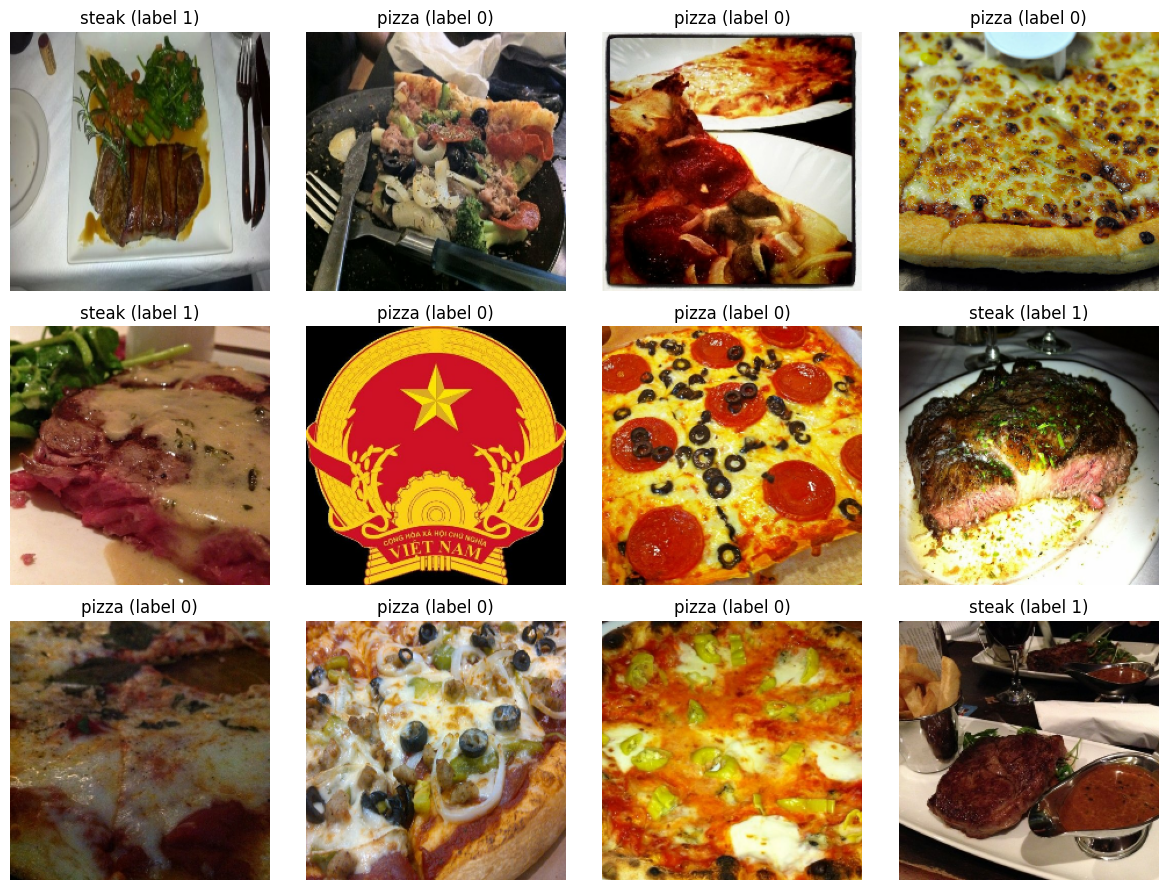

In [39]:
plot_images_from_dataset(dataset=train_ds, class_names=class_names, n=12)

In [40]:
for image_batch, labels_batch in train_ds: 
    print(image_batch.shape) 
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


## Homework / Practice & Exercise 
https://poloclub.github.io/cnn-explainer/

In [56]:
## Trying our data on non CNN Model 

## Model-2

keras.utils.set_random_seed(42)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_height, img_width, 3)),
    keras.layers.Dense(150, activation='relu'), 
    keras.layers.Dense(150, activation='relu'),
    # keras.layers.Dense(150, activation='relu'),
    # keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

model_2.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_2.summary()


history_2 = model_2.fit(
    normalized_train_ds, 
    epochs=50, 
    validation_data=normalized_test_ds, 
    callbacks=callbacks, 
    verbose=0
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 150)            │    22,579,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,602,151 (86.22 MB)

 Trainable params: 22,602,151 (86.22 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_2.evaluate(normalized_test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7024 - loss: 1.1174 


[1.2054051160812378, 0.6899999976158142]

In [70]:
y_preds = model_1.predict(normalized_test_ds)
y_preds_act = np.round(np.squeeze(y_preds))
y_preds_act[:10]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([0., 0., 1., 0., 0., 0., 1., 1., 0., 1.], dtype=float32)